In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import numpy as np

In [44]:
data = pd.read_csv("dadosSP1.csv")
data.head()

Unnamed: 0 NO_MUNICIPIO_RESIDENCIA  NU_IDADE TP_SEXO  TP_COR_RACA  \
0           0              Araraquara      29.0       F            1   
1          21                 Diadema      19.0       F            1   
2          25         Santa Fé do Sul      24.0       M            1   
3          32               São Paulo      28.0       F            2   
4          45               São Paulo      18.0       F            1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  IN_TREINEIRO  \
0                1               11          1             0   
1                1                2          1             0   
2                1                7          1             0   
3                1               11          1             0   
4                1                1          1             0   

   TP_DEPENDENCIA_ADM_ESC  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
0                     NaN       445.4       589.0       621.5       465.5   
1                     NaN       402.9       447.6       537.3       425.5   
2                     NaN       706.5       709.9       625.1       769.1   
3                     NaN       631.1       609.7       596.1       535.5   
4                     NaN       685.2       719.2       619.4       799.6   

   NU_NOTA_REDACAO Q006 Q027  
0            560.0    D    A  
1            640.0    B    A  
2            620.0    I    D  
3            720.0    J    A  
4            800.0    H    D

In [45]:
data_s = data.sample(2500)

In [46]:
data_s['Mean_notes'] = (data_s.NU_NOTA_CH+data_s.NU_NOTA_CN+data_s.NU_NOTA_LC + data_s.NU_NOTA_MT + data_s.NU_NOTA_REDACAO)/5

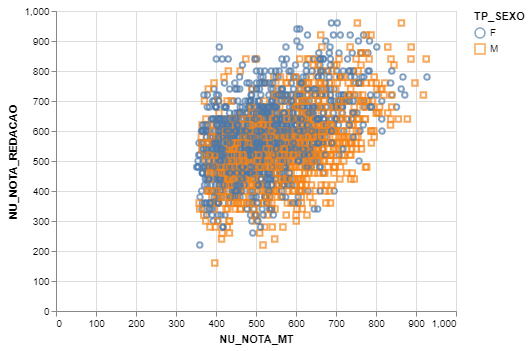

In [47]:
alt.Chart(data_s).mark_point().encode(x = 'NU_NOTA_MT', y = 'NU_NOTA_REDACAO', color = 'TP_SEXO', shape = 'TP_SEXO')

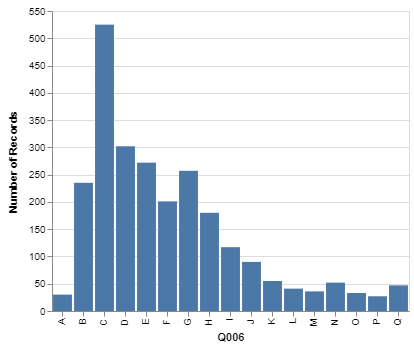

In [48]:
alt.Chart(data_s).mark_bar().encode(x='Q006', y = 'count()')

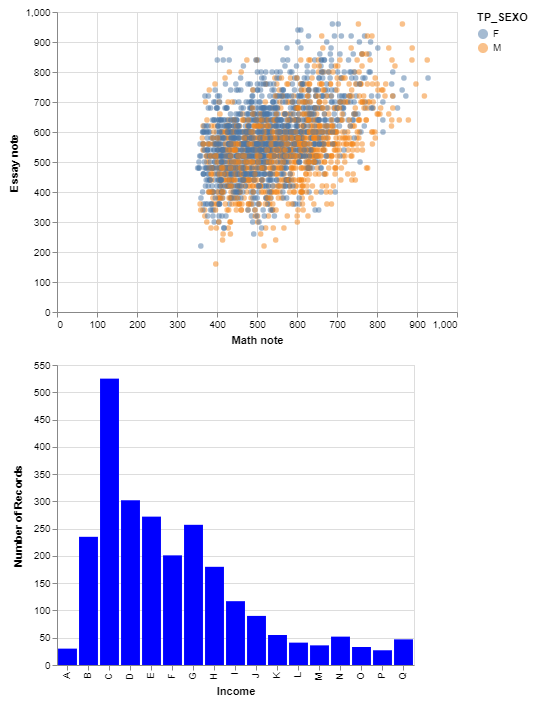

In [49]:
#mapping the dataframe
dic = {'A':'R$0','B':'R$937','C':'R$1.405','D':'R$1874','E':'R$2.342','F':'R$2.811',
       'G':'R$3.748','H':'R$4.685','I':'R$5.622','J':'R$6.599','K':'R$7.496','L':'R$8.433',
       'M':'R$9.370','N':'R$11.244','O':'R$14.055','P':'R$18.740','Q':'More than R$18.740'}
#data_s.Q006 = data_s.Q006.map(dic)
#ploting the altair
brush = alt.selection_interval()
chart1 = alt.Chart().mark_circle(opacity = 0.5).encode(
    alt.X('NU_NOTA_MT', title = 'Math note'), 
    alt.Y('NU_NOTA_REDACAO', title = 'Essay note'), 
    color='TP_SEXO').add_selection(brush)
chart2 = alt.Chart().mark_bar().encode(
    alt.Y('count()'),
    alt.X('Q006', title = 'Income'),
    color=alt.value('blue')).transform_filter(brush)
alt.vconcat(chart1, chart2, data = data_s)